In [1]:
import os
from random import seed, sample
import numpy as np
import cv2
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras import layers, models
from keras.optimizers import SGD, Adam
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from matplotlib import pyplot as plt
from keras import regularizers
from keras.initializers import VarianceScaling
import math

Using TensorFlow backend.


In [3]:
epochs = 120

#data
batch_size = 256
amount = 25000 #for each category
folder = '50k' #amount of training samples

#configuration
LearningRate = 1e-3
Optimizer = 'adam' #sgd, adam
vgg = 'bnv1' #vgg16, vgg16own, dropv1, dropv2, dropv3, bnv1, bnv2, dropbnv1
mode = 'fc' #fc, fcl2, gap

In [4]:
path1 = os.path.join('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount', folder)
path = 'E:\\deeplearning\\Hepatocarcinomes\\data\\5x\\training\\split64_image'

In [4]:
lpos_ = []
for root, dirs, files in os.walk(path+'\\pos_nor_5k' , topdown=True):#5k: the subfolder has 50k except last one
    for f in files:
        if f.endswith('.tif'):
            lpos_.append(root+'\\'+f)
seed(1)
lpos = sample(lpos_, amount)
lpos_train = lpos[0:int(amount*0.8)]
lpos_val = lpos[int(amount*0.8):amount]

In [5]:
lneg_ = []
for root, dirs, files in os.walk(path+'\\neg_tum_5k' , topdown=True):
    for f in files:
        if f.endswith('.tif'):
            lneg_.append(root+'\\'+f)
seed(1)
lneg = sample(lneg_, amount)
lneg_train = lneg[0:int(amount*0.8)]
lneg_val = lneg[int(amount*0.8):amount]

In [6]:
ltrain = lpos_train + lneg_train
lval = lpos_val + lneg_val
np.random.seed(1) 
np.random.shuffle(ltrain)
np.random.shuffle(lval)

In [7]:
img_train = np.ndarray((int(amount*1.6), 64, 64, 3))
for i in range(int(amount*1.6)):
    img_train[i, :, :, :] = cv2.cvtColor(cv2.imread(ltrain[i], -1), cv2.COLOR_BGR2RGB)/255

In [8]:
img_val = np.ndarray((int(amount*0.4), 64, 64, 3))
for i in range(int(amount*0.4)):
    img_val[i, :, :, :] =cv2.cvtColor(cv2.imread(lval[i], -1), cv2.COLOR_BGR2RGB)/255

In [9]:
y_train = np.vstack((np.ones(int(amount*0.8), np.float32), np.zeros(int(amount*0.8), np.float32)))
y_val = np.vstack((np.ones(int(amount*0.2), np.float32), np.zeros(int(amount*0.2), np.float32)))

y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)

np.random.seed(1) 
np.random.shuffle(y_train)
np.random.shuffle(y_val)

y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)

In [10]:
# base_model.layers

In [11]:
# base_model.layers[19].get_config()

In [12]:
# from keras.engine import input_layer

# x = input_layer.Input(shape=(64,64,3), dtype='float32', sparse=False)
# y = layers.Conv2D(64, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block1_conv1')(x)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# # y = layers.Dropout(0.1, seed=1)(y)
# y = layers.Conv2D(64, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block1_conv2')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# # y = layers.Dropout(0.1, seed=1)(y)
# y = layers.MaxPooling2D(name='block1_pool')(y)

# y = layers.Conv2D(128, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block2_conv1')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# # y = layers.Dropout(0.15, seed=1)(y)
# y = layers.Conv2D(128, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block2_conv2')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# # y = layers.Dropout(0.15, seed=1)(y)
# y = layers.MaxPooling2D(name='block2_pool')(y)

# y = layers.Conv2D(256, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block3_conv1')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# y = layers.Dropout(0.1, seed=1)(y)
# y = layers.Conv2D(256, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block3_conv2')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# y = layers.Dropout(0.1, seed=1)(y)
# y = layers.Conv2D(256, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block3_conv3')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# y = layers.Dropout(0.1, seed=1)(y)
# y = layers.MaxPooling2D(name='block3_pool')(y)
# # y = layers.Dropout(0.1, seed=1)(y)
# y = layers.Conv2D(512, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block4_conv1')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# y = layers.Dropout(0.15, seed=1)(y)
# y = layers.Conv2D(512, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block4_conv2')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# y = layers.Dropout(0.15, seed=1)(y)
# y = layers.Conv2D(512, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block4_conv3')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# y = layers.Dropout(0.15, seed=1)(y)
# y = layers.MaxPooling2D(name='block4_pool')(y)
# # y = layers.Dropout(0.1, seed=1)(y)
# y = layers.Conv2D(512, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block5_conv1')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# y = layers.Dropout(0.2, seed=1)(y)
# y = layers.Conv2D(512, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block5_conv2')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# y = layers.Dropout(0.2, seed=1)(y)
# y = layers.Conv2D(512, (3, 3), padding='same', data_format="channels_last", kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform', seed=None), name='block5_conv3')(y)
# y = layers.Activation('relu')(y)
# # y = layers.BatchNormalization()(y)
# y = layers.Dropout(0.2, seed=1)(y)
# y = layers.MaxPooling2D(name='block5_pool')(y)

# model = models.Model(x, y)

# model.summary()

# model.save('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount\\vgg16_drop_v2.hdf5')

# del(model)

In [5]:
def vggArch(vgg='vgg16'):
    if vgg == 'vgg16':
        base_model = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(64,64,3), pooling=None)
    elif vgg == 'vgg16own':
        base_model = models.load_model('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount\\vgg16_own.hdf5')
        base_model.load_weights('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount_\\vgg16_imagenet_weights.hdf5', by_name=True)
    elif vgg == 'dropv1':
        base_model = models.load_model('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount\\vgg16_drop_v1.hdf5')
        base_model.load_weights('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount_\\vgg16_imagenet_weights.hdf5', by_name=True)
    elif vgg == 'dropv2':
        base_model = models.load_model('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount\\vgg16_drop_v2.hdf5')
        base_model.load_weights('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount_\\vgg16_imagenet_weights.hdf5', by_name=True)
    elif vgg == 'dropv3':
        base_model = models.load_model('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount\\vgg16_drop_v3.hdf5')
        base_model.load_weights('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount_\\vgg16_imagenet_weights.hdf5', by_name=True)
    elif vgg == 'bnv1':
        base_model = models.load_model('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount\\vgg16_bn_v1.hdf5')
        base_model.load_weights('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount_\\vgg16_imagenet_weights.hdf5', by_name=True)
    elif vgg == 'bnv2':
        base_model = models.load_model('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount\\vgg16_bn_v2.hdf5')
        base_model.load_weights('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount_\\vgg16_imagenet_weights.hdf5', by_name=True)
    elif vgg == 'dropbnv1':
        base_model = models.load_model('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount\\vgg16_drop_bn_v1.hdf5')
        base_model.load_weights('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount_\\vgg16_imagenet_weights.hdf5', by_name=True)

    return base_model

In [6]:
def modelArch(mode='fc'):
    if mode == 'fc':
        x = base_model.output
        x = layers.Flatten()(x)
#         x = layers.Dense(4096, use_bias=False, kernel_regularizer=regularizers.l2(0.00001))(x)
        x = layers.Dense(4096, use_bias=False)(x)
        x = layers.BatchNormalization(name='bn1')(x) #have to set a layer name, otherwise it will lead to a ValueError 
        x = layers.Activation('relu', name='activation1')(x)
        x = layers.Dropout(0.5, seed=1, name='drop1')(x)
        x = layers.Dense(512, use_bias=False)(x)
        x = layers.BatchNormalization(name='bn2')(x)
        x = layers.Activation('relu', name='activation2')(x)
        x = layers.Dropout(0.5, seed=1, name='drop2')(x)
        predictions = layers.Dense(2, activation = 'softmax')(x)
        model = models.Model(input=base_model.input, output=predictions)
    elif mode == 'fcl2':
        x = base_model.output
        x = layers.Flatten()(x)
        x = layers.Dense(4096, use_bias=False, kernel_regularizer=regularizers.l2(0.00001))(x)
        x = layers.BatchNormalization(name='bn1')(x) #have to set a layer name, otherwise it will lead to a ValueError 
        x = layers.Activation('relu', name='activation1')(x)
        x = layers.Dropout(0.5, seed=1, name='drop1')(x)
        x = layers.Dense(512, use_bias=False, kernel_regularizer=regularizers.l2(0.00001))(x)
        x = layers.BatchNormalization(name='bn2')(x)
        x = layers.Activation('relu', name='activation2')(x)
        x = layers.Dropout(0.5, seed=1, name='drop2')(x)
        predictions = layers.Dense(2, activation = 'softmax')(x)
        model = models.Model(input=base_model.input, output=predictions)
    elif mode == 'gap':
        x = base_model.output
        x = layers.GlobalAveragePooling2D(data_format='channels_last')(x)
        predictions = layers.Dense(2, activation = 'softmax')(x)
        model = models.Model(input=base_model.input, output=predictions)
    return model

In [7]:
base_model = vggArch(vgg)
model = modelArch(mode)

C:\Program Files\Anaconda3\envs\r-tensorflow\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Program Files\Anaconda3\envs\r-tensorflow\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
activation_14 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
activation_15 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
__________

In [82]:
def modelCompile(Opt='sgd'):
    if Opt == 'sgd':
        model.compile(optimizer = SGD(lr = LearningRate, decay=0.001, momentum=0.9), loss = 'categorical_crossentropy', metrics = ['accuracy']) #lr=0.001
    elif Opt == 'adam':
        model.compile(optimizer = Adam(lr = LearningRate), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [83]:
modelCompile(Optimizer)

In [84]:
# model.compile(optimizer = Adam(lr = 1e-3), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [85]:
csv_logger = CSVLogger(path1+'\\1_'+vgg+'_'+mode+'_'+Optimizer+'_'+str(batch_size)+'_'+str(int(math.log(LearningRate,0.1)))+'_training.csv', append=True)
# model_checkpoint = ModelCheckpoint(path1+'\\1_'+vgg+'_'+mode+'_'+Optimizer+'_'+str(batch_size)+'_'+str(int(math.log(LearningRate,0.1)))+'_weights.{epoch:02d}-{val_acc:.4f}.hdf5', verbose=1, save_best_only=True, save_weights_only=True)
early_stop = EarlyStopping(patience=13, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, min_delta=0.005, patience=7, verbose=1)
results = model.fit(img_train, y_train, batch_size, epochs=100, verbose=1, callbacks=[csv_logger, early_stop, reduce_lr], validation_data=(img_val, y_val))
csv_logger.csv_file.close()

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 63s 2ms/step - loss: 0.6479 - acc: 0.6924 - val_loss: 6.1319 - val_acc: 0.5000
Epoch 2/100
40000/40000 [==============================] - 55s 1ms/step - loss: 0.4509 - acc: 0.8047 - val_loss: 0.4531 - val_acc: 0.8040
Epoch 3/100
40000/40000 [==============================] - 55s 1ms/step - loss: 0.3905 - acc: 0.8377 - val_loss: 0.8609 - val_acc: 0.6241
Epoch 4/100
40000/40000 [==============================] - 55s 1ms/step - loss: 0.3529 - acc: 0.8542 - val_loss: 0.5304 - val_acc: 0.7677
Epoch 5/100
40000/40000 [==============================] - 56s 1ms/step - loss: 0.3301 - acc: 0.8634 - val_loss: 0.4298 - val_acc: 0.8099
Epoch 6/100
40000/40000 [==============================] - 56s 1ms/step - loss: 0.3136 - acc: 0.8721 - val_loss: 0.3157 - val_acc: 0.8691
Epoch 7/100
40000/40000 [==============================] - 56s 1ms/step - loss: 0.2945 - acc: 0.8824 - val_loss: 0.3670 - 

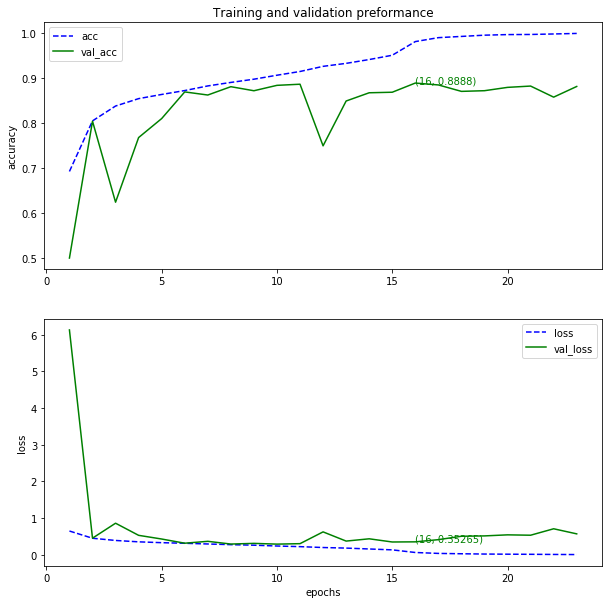

In [86]:
#plot training results
acc=results.history['acc']
val_acc=results.history['val_acc']
loss=results.history['loss']
val_loss=results.history['val_loss']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.ylabel('accuracy')
# plt.ylim((0, 5))

epochs=range(1, len(acc)+1)
plt.plot(epochs,acc,'b--',label='acc')
plt.plot(epochs, val_acc,'g',label='val_acc')
index0=np.where(val_acc==np.amax(val_acc))[0]
if(len(index0)>3):
    for i in range(2):
        plt.text(epochs[int(i)], val_acc[int(i)], str((epochs[int(i)], val_acc[int(i)])),color='g')
else:
    for i in index0:
        plt.text(epochs[int(i)], val_acc[int(i)], str((epochs[int(i)], val_acc[int(i)])),color='g')
    
plt.title('Training and validation preformance')
plt.legend()

plt.subplot(2,1,2)
plt.xlabel('epochs')
plt.ylabel('loss')
# plt.ylim((0, 5))

epochs=range(1, len(loss)+1)
plt.plot(epochs,loss,'b--',label='loss')
plt.plot(epochs, val_loss,'g',label='val_loss')
if(len(index0)>3):
    for i in range(2):
        plt.text(epochs[int(i)], val_loss[int(i)], str((epochs[int(i)], val_loss[int(i)])),color='g')
else:
    for i in index0:
        plt.text(epochs[int(i)], val_loss[int(i)], str((epochs[int(i)], round(val_loss[int(i)],5))),color='g')
    
plt.legend()
plt.savefig(path1+'\\1_'+vgg+'_'+mode+'_'+Optimizer+'_'+str(batch_size)+'_lr'+str(int(math.log(LearningRate,0.1)))+'_training_validation_performance.png')
plt.show()

In [87]:
model.save(path1 +'\\1_'+vgg+'_'+mode+'_'+Optimizer+'_'+str(batch_size)+'_lr'+str(int(math.log(LearningRate,0.1)))+'_best_model.hdf5')

In [88]:
del(base_model)
del(model)

####best parameters:
50k: batch_size=128, optimizer=Adam (lr=3)
